In [199]:
import numpy as np
import pandas as pd

In [200]:
df = pd.read_csv('spam.csv', encoding='latin1')



In [201]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [202]:
df.shape

(5572, 5)

## 1.Data cleaning

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [204]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [205]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [206]:
#renaming the columns
df.rename(columns={'v1' : 'Target','v2' : 'Text'},inplace=True)

In [207]:
df.sample(5)

,Target,Text
1773,ham,"I'm not coming over, do whatever you want"
1891,ham,Probably earlier than that if the station's wh...
3263,ham,I will send them to your email. Do you mind &...
316,ham,Hmmm... Guess we can go 4 kb n power yoga... H...
3801,ham,No da. I am happy that we sit together na


In [208]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [209]:
df['Target']=encoder.fit_transform(df['Target'])

In [210]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [211]:
#checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [212]:
#checking duplicate values
df.duplicated().sum()

403

In [213]:
#remove duplicate values
df=df.drop_duplicates(keep='first')

In [214]:
df.shape

(5169, 2)

## EDA

In [215]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [216]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

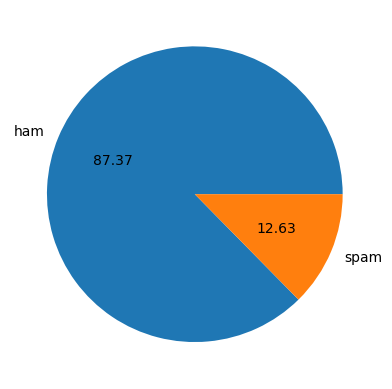

In [217]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [218]:
# Data is inbalanced

In [219]:
import nltk

In [220]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rizwan
[nltk_data]     computers\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [221]:
df['num_characters']=df['Text'].apply(len)

In [222]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [223]:
#num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [224]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [225]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [226]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [227]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [228]:
#ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [229]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


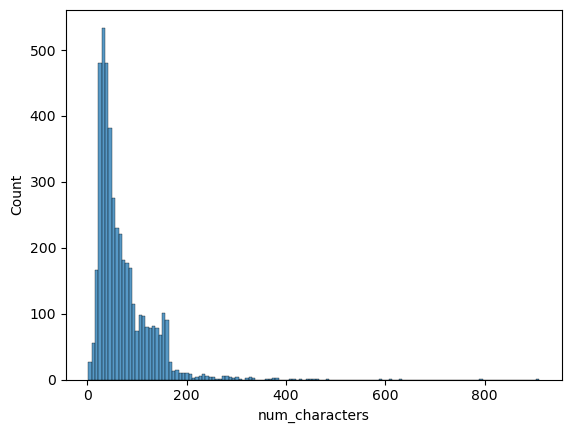

In [230]:
import seaborn as sns
import pandas as pd

# Assuming you have defined your DataFrame 'df' and 'Target' column correctly
try:
    sns.histplot(df[df['Target'] == 0]['num_characters'])
except pd.errors.OptionError:
    # Handle the error gracefully, or use an alternative plot method
    print("OptionError: 'mode.use_inf_as_null' not found. Using alternative plot method.")
    # Example: Using matplotlib instead
    import matplotlib.pyplot as plt
    plt.hist(df[df['Target'] == 0]['num_characters'])
    plt.show()






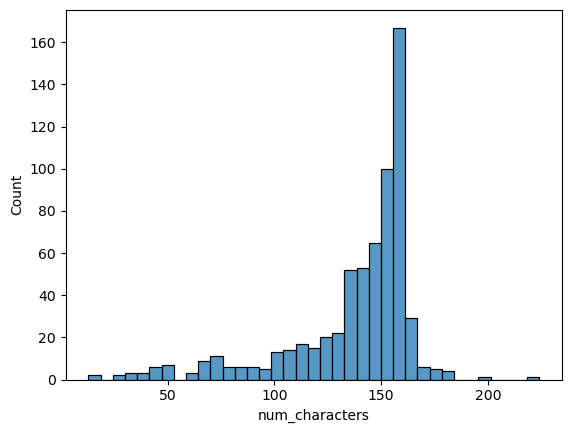

In [231]:
# Assuming you have defined your DataFrame 'df' and 'Target' column correctly
try:
    sns.histplot(df[df['Target'] == 1]['num_characters'])
except pd.errors.OptionError:
    # Handle the error gracefully, or use an alternative plot method
    print("OptionError: 'mode.use_inf_as_null' not found. Using alternative plot method.")
    # Example: Using matplotlib instead
    import matplotlib.pyplot as plt
    plt.hist(df[df['Target'] == 1]['num_characters'])
    plt.show()

In [232]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

<AxesSubplot:ylabel='count'>

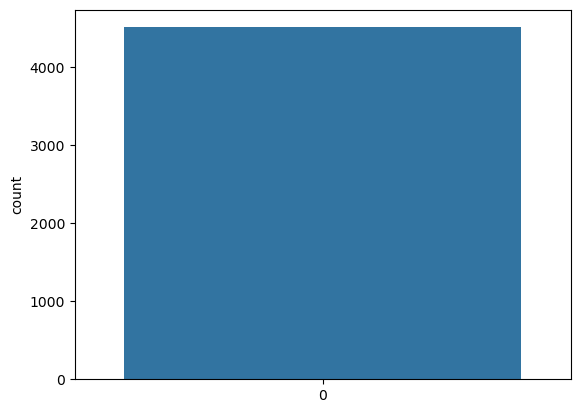

In [233]:
sns.countplot(df[df['Target']==0]['num_characters'])

In [234]:
#plt.hist(df[df['Target'] == 1]['num_characters'])

<AxesSubplot:>

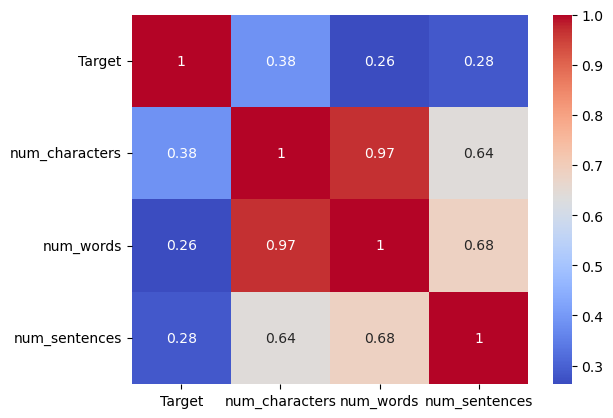

In [235]:


# Assuming your DataFrame is named 'df'
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')


In [236]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import string
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to C:\Users\Rizwan
[nltk_data]     computers\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rizwan
[nltk_data]     computers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [237]:
ps = PorterStemmer()

# #Data preprocessing
##lower case
##Tokenization
##Removing special characters
##Removing stop words and punctuations
##Stemming


In [238]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
     
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [239]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\rizwan computers\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex


In [240]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [241]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [242]:
df['transform_text'] = df['Text'].apply(transform_text)

In [243]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [244]:
!pip install wordcloud


In [245]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [246]:
spam_wc = wc.generate(df[df['Target'] == 1]['transform_text'].str.cat(sep=' '))

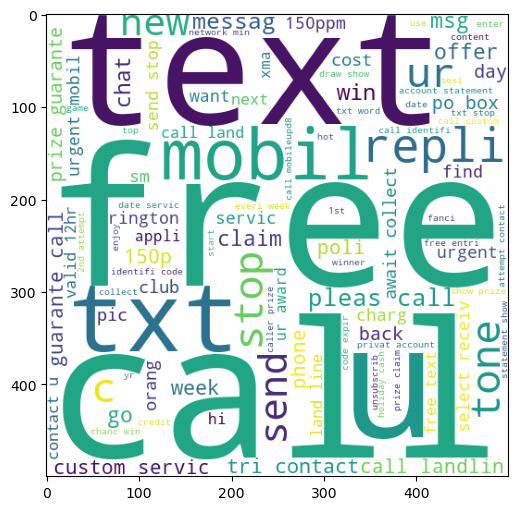

In [247]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [248]:
ham_wc = wc.generate(df[df['Target'] ==0]['transform_text'].str.cat(sep=' '))

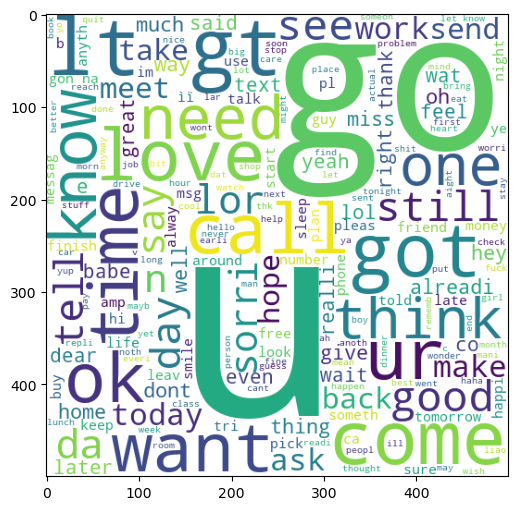

In [249]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [250]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [251]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [252]:
len(spam_corpus)

9939

In [253]:
#import seaborn as sns
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

<AxesSubplot:>

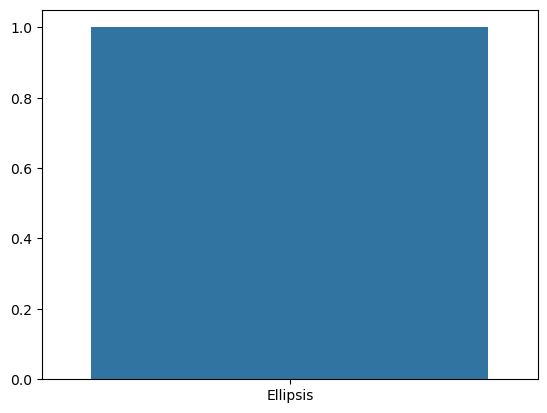

In [254]:
import seaborn as sns
from collections import Counter
import pandas as pd

# Assuming you have the 'spam_corpus' list or data ready
spam_corpus = [...]  # Replace [...] with your actual data

# Use Counter to get the 30 most common elements and their frequencies
most_common_elements = Counter(spam_corpus).most_common(30)

# Create pandas Series for x and y data
x_data = pd.Series([item[0] for item in most_common_elements])
y_data = pd.Series([item[1] for item in most_common_elements])

# Create the bar plot using seaborn
sns.barplot(x=x_data, y=y_data)


In [255]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

<AxesSubplot:>

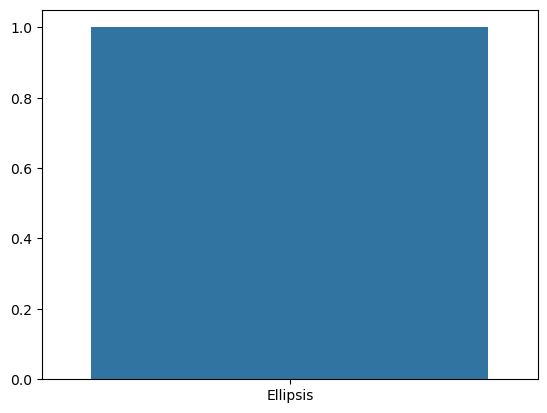

In [256]:

# Assuming you have the 'spam_corpus' list or data ready
ham_corpus = [...]  # Replace [...] with your actual data

# Use Counter to get the 30 most common elements and their frequencies
most_common_elements = Counter(ham_corpus).most_common(30)

# Create pandas Series for x and y data
x_data = pd.Series([item[0] for item in most_common_elements])
y_data = pd.Series([item[1] for item in most_common_elements])

# Create the bar plot using seaborn
sns.barplot(x=x_data, y=y_data)

# Model building

In [257]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [258]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pandas as pd

# Assuming you have a DataFrame called df with a 'transform_text' column containing textual data
# Initialize the CountVectorizer with optional parameters if needed
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# Assuming 'df' is your DataFrame
x = tfidf.fit_transform(df['transform_text']).toarray()


In [259]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [260]:
x.shape

(5169, 3000)

In [261]:
y = df['Target'].values

In [262]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Train test split

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [265]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [266]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [267]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [269]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [270]:
#tfidf----->MNB

In [271]:
!pip install xgboost


In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [273]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [274]:
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'NB'  : mnb,
    'DT'  : dtc,
    'LR'  : lrc,
    'RF'  : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'xgb' : xgb
}

In [275]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [276]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [277]:
#accuracy_lists = []
#precision_lists = []

#for name,clf in clfs.items():
 #   current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
  #  print('For ',name)
   # print('Accuracy - ',current_accuracy)
    #print('Precision - ',current_precision)
    
    #accuracy_lists.append(current_accuracy)
    #precision_lists.append(current_precision)
    

In [278]:
from sklearn.metrics import accuracy_score, precision_score

Accuracy_list = []
Precision_list = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)
    
    Accuracy_list.append(current_accuracy)
    Precision_list.append(current_precision)




For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\Users\Rizwan computers\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [279]:
performance_df = pd.DataFrame({'Algorithm' :clfs.keys(),'Accuracy':Accuracy_list,'Precision':Precision_list}).sort_values('Precision',ascending=False)

In [280]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [281]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [282]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


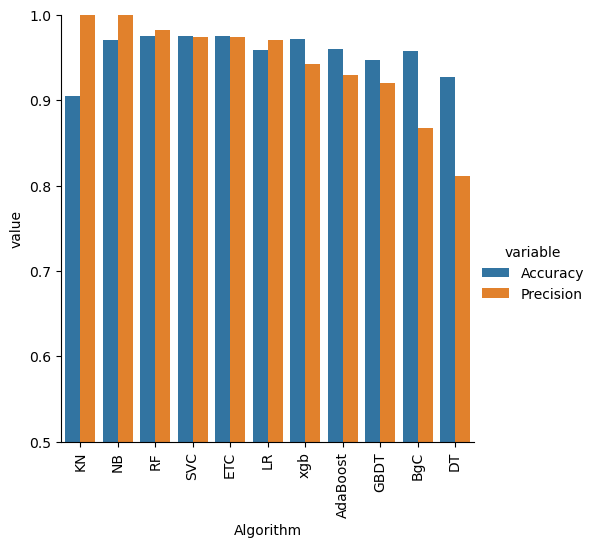

In [283]:
sns.catplot(x = 'Algorithm', y='value',
           hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [284]:
#model improvment changes
#1.change the max_features parameter of Tfidf

In [285]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':Accuracy_list,'Precision_max_ft_3000':Precision_list})

In [286]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scalling':Accuracy_list,'Precision_scaling':Precision_list})

In [287]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [288]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [289]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':Accuracy_list,'Precision_num_chars':Precision_list})

In [290]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scalling_x,Precision_scaling_x,Accuracy_scalling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [291]:
#voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [292]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [293]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [294]:
y_pred = voting.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [306]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [307]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(mnb,open('mod.pkl','wb'))